In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#닥스훈트의 길이와 높이
dach_length = [75, 77, 83, 81, 73, 99, 72, 83]
dach_height = [24, 29, 19, 32, 21, 22, 19, 34]

#사모예드의 길이와 높이
samo_length = [76, 78, 82, 88, 76, 83, 81, 89]
samo_height = [55, 58, 53, 54, 61, 52, 57, 64]

#말티즈의 길이와 높이
mal_length = [35, 39, 38, 41, 30, 57, 41, 35]
mal_height = [23, 26, 19, 30, 21, 24, 28, 20]
m_label = []

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data)) #닥스훈트 0으로 라벨링

s_data = np.column_stack((samo_length, samo_height))
s_label = np.ones(len(s_data)) #사모예드 1로 라벨링

m_data = np.column_stack((mal_length, mal_height))
for _ in range(len(m_data)):
  m_label.append(2) # 말티즈 2로 라벨링

print("{}({}): {}".format("닥스훈트", int(d_label[0]), d_data.tolist()))
print("{}({}): {}".format("사모예드", int(s_label[0]), s_data.tolist()))
print("{}({}): {}".format("말티즈", int(m_label[0]), m_data.tolist()))



닥스훈트(0): [[75, 24], [77, 29], [83, 19], [81, 32], [73, 21], [99, 22], [72, 19], [83, 34]]
사모예드(1): [[76, 55], [78, 58], [82, 53], [88, 54], [76, 61], [83, 52], [81, 57], [89, 64]]
말티즈(2): [[35, 23], [39, 26], [38, 19], [41, 30], [30, 21], [57, 24], [41, 28], [35, 20]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

dogs = np.concatenate((d_data, s_data, m_data)) 
labels = np.concatenate((d_label, s_label, m_label))

dog_classes = {0:'Dachshund', 1:'Samoyed', 2:'Maltis'}

k =3 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(dogs, labels) 

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_all = knn.predict(dogs) #dogs데이터에 대한 예측값
conf_mat = confusion_matrix(labels, y_pred_all) #실제 라벨값과 예측값의 혼동행렬
conf_mat

array([[8, 0, 0],
       [0, 8, 0],
       [1, 0, 7]])

In [ ]:
#새로운 데이터에서 k값 변화에 따른 분류 결과 출력
print('A 데이터 분류결과')
for k in [3,5,7]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(dogs, labels) 
  A = [[58, 30]]
  y_pred = knn.predict(A)
  print('A', A,': n_neighbors가 {}일때 :{}'.format(k, dog_classes[y_pred[0]]))

print('\n')
print('B 데이터 분류결과')
for k in [3,5,7]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(dogs, labels) 
  B = [[80, 26]]
  y_pred = knn.predict(B)
  print('B', B,': n_neighbors가 {}일때 :{}'.format(k, dog_classes[y_pred[0]]))

print('\n')
print('C 데이터 분류결과')
for k in [3,5,7]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(dogs, labels) 
  C = [[80, 41]]
  y_pred = knn.predict(C)
  print('C', C,': n_neighbors가 {}일때 :{}'.format(k, dog_classes[y_pred[0]]))

print('\n')
print('D 데이터 분류결과')
for k in [3,5,7]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(dogs, labels) 
  D = [[75, 55]]
  y_pred = knn.predict(D)
  print('D', D,': n_neighbors가 {}일때 :{}'.format(k, dog_classes[y_pred[0]]))

A 데이터 분류결과
A [[58, 30]] : n_neighbors가 3일때 :Maltis
A [[58, 30]] : n_neighbors가 5일때 :Maltis
A [[58, 30]] : n_neighbors가 7일때 :Dachshund


B 데이터 분류결과
B [[80, 26]] : n_neighbors가 3일때 :Dachshund
B [[80, 26]] : n_neighbors가 5일때 :Dachshund
B [[80, 26]] : n_neighbors가 7일때 :Dachshund


C 데이터 분류결과
C [[80, 41]] : n_neighbors가 3일때 :Dachshund
C [[80, 41]] : n_neighbors가 5일때 :Dachshund
C [[80, 41]] : n_neighbors가 7일때 :Samoyed


D 데이터 분류결과
D [[75, 55]] : n_neighbors가 3일때 :Samoyed
D [[75, 55]] : n_neighbors가 5일때 :Samoyed
D [[75, 55]] : n_neighbors가 7일때 :Samoyed


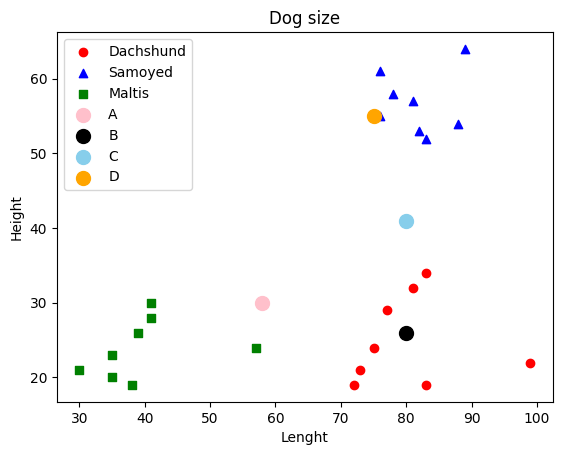

In [ ]:
#위에서 한거 산포도 데이터로 나타내기

plt.scatter(dach_length, dach_height, c='red', label = 'Dachshund')
plt.scatter(samo_length, samo_height, c='blue',marker='^', label = 'Samoyed')
plt.scatter(mal_length, mal_height, c='green',marker='s', label = 'Maltis')
plt.scatter(x=58, y=30, c = 'pink', s =100, label = 'A') #새로운데이터
plt.scatter(x=80, y=26, c = 'black', s =100, label = 'B') #새로운데이터
plt.scatter(x=80, y=41, c = 'skyblue', s =100, label = 'C') #새로운데이터
plt.scatter(x=75, y=55, c = 'orange', s =100, label = 'D') #새로운데이터

plt.xlabel('Lenght')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc = 'upper left')
plt.show()

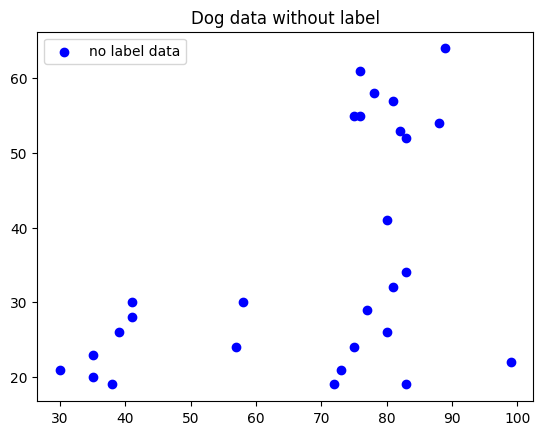

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


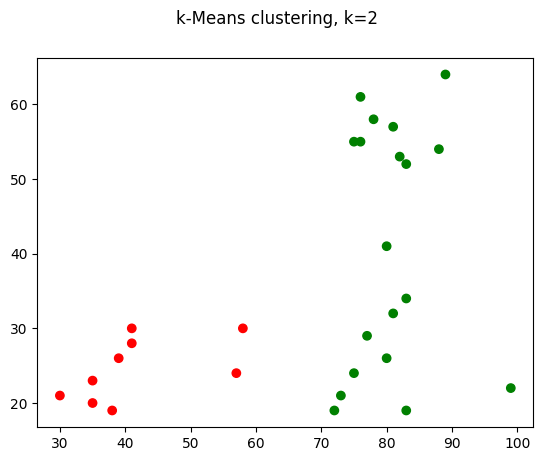

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


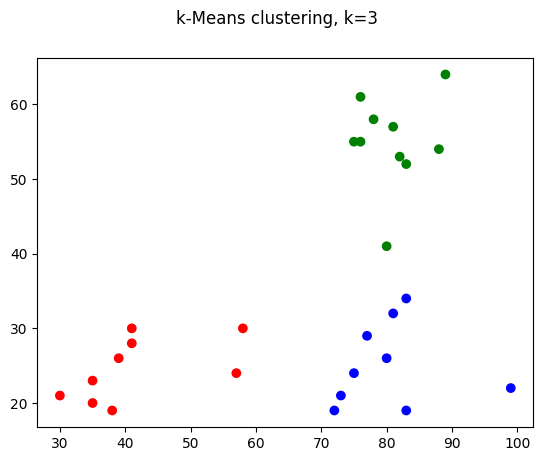

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


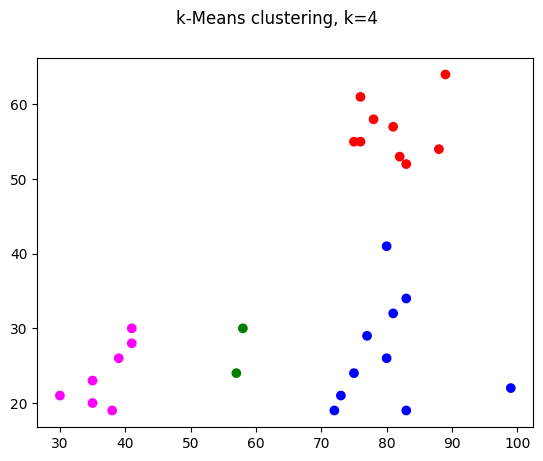

In [ ]:
#k-평균 알고리즘을 적용해서 k값 변화에 따른 plot함수 그리기
new_dogs = np.concatenate((d_data, s_data, m_data,A, B, C, D)) #원래의 데이터와 A, B, C,D 데이터 합치기

from sklearn import cluster

def kmeans_predict_plot(X,k):
  model = cluster.KMeans(n_clusters = k)
  model.fit(X)
  labels = model.predict(X)
  colors = np.array(['red', 'green', 'blue', 'magenta'])
  plt.suptitle('k-Means clustering, k={}'.format(k))
  plt.scatter(X[:,0], X[:,1], color = colors[labels])
  plt.show()

plt.title('Dog data without label')
plt.scatter(new_dogs[:,0], new_dogs[:,1], color = 'blue', label = 'no label data')
plt.legend(loc = 'upper left')
plt.show()

for k in [2,3,4]:
  kmeans_predict_plot(new_dogs, k)